In [12]:
import numpy as np
%matplotlib inline
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D



def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    a = np.sqrt((cov[0,0]+cov[1,1])/2. + np.sqrt((cov[0,0]-cov[1,1])**2/4. + cov[0,1]**2))
    b = np.sqrt((cov[0,0]+cov[1,1])/2. - np.sqrt((cov[0,0]-cov[1,1])**2/4. + cov[0,1]**2))
    theta = np.degrees(np.arctan2(2*cov[0,1],cov[0,0]-cov[1,1]))/2
    alphas = np.asarray((2.3,6.17,11.8))
    alpha = np.sqrt(alphas[nstd-1]) 
    # Width and height are "full" widths, not radius
    ellip = Ellipse(xy=pos, width=2*alpha*a, height=2*alpha*b, angle=theta, **kwargs)
    ax.add_artist(ellip)
    return ellip

def plot_triangular(fisher_list, parameter_list, center_list, delta_list):
    n_params = len(parameter_list) #You need to make sure your parameters are in the same order as in your fisher matrix
    names = {'H0':r'$H_0$','A_s':r'$A_s$','109A_s':r'$10^9 A_s$','ln10A_s':r'$\ln(10^{10}a_s)$',
    'N_eff':r'$N_{eff}$','Y_He':r'$Y_{He}$','ombh2':r'$\Omega_bh^2$','omch2':r'$\Omega_ch^2$',
    'theta_MC':r'$\theta_{MC}$','n_s':r'$n_s$','tau':r'$\tau$','fde_zc':r'$fde_{zc}$', 'zc':r'$zc$', 'theta_i':r'$\theta_{i}$'} #Add EDE parameters, this is just nicely written names 
    #plt.rc('text', usetex = True) 
    covariance = np.linalg.inv(fisher_list) #the covariance matrix is the inverse of the fisher
    fig,axs = plt.subplots(n_params,n_params, figsize=(10,10), dpi=500)
    plt.subplots_adjust(wspace=0.1, hspace=0.1,left=0.1,right=0.98,top = 0.98,bottom=0.1)
    for i in range(n_params):
        for j in range(i+1):
            if i != j:
                cov_rayleigh = covariance[0][np.ix_([j,i],[j,i])]
                cov_normal = covariance[1][np.ix_([j,i],[j,i])]
                e1 = plot_cov_ellipse(cov_rayleigh,[center_list[j],center_list[i]],ax=axs[i,j],nstd = 1,lw = 1.2, fc = 'None',alpha = 1, ec = 'b')
                e2 = plot_cov_ellipse(cov_normal,[center_list[j],center_list[i]],ax=axs[i,j],nstd = 1,lw = 1.2, fc = 'None',alpha = 1, ec = 'r')

                axs[i,j].scatter(center_list[j],center_list[i], c = 'r', marker = '+')
                axs[i,j].grid(color='k', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
                axs[i,j].set_xlim(center_list[j]-delta_list[j], center_list[j]+delta_list[j])
                axs[i,j].set_ylim(center_list[i]-delta_list[i], center_list[i]+delta_list[i])
                axs[i,j].xaxis.set_ticks(np.linspace(center_list[j]-delta_list[j], center_list[j]+delta_list[j],5))
                axs[i,j].tick_params(axis='x', rotation=-45)
                axs[i,j].yaxis.set_ticks(np.linspace(center_list[i]-delta_list[i], center_list[i]+delta_list[i],5))
                for label in axs[i,j].xaxis.get_ticklabels()[::2]:
                    label.set_visible(False)
                for label in axs[i,j].yaxis.get_ticklabels()[::2]:
                    label.set_visible(False)
                fig.delaxes(axs[j,i]) #delete unused plots
                
            else: 
                xx = np.linspace(center_list[i]-6*delta_list[i], center_list[i]+6*delta_list[i], 2000)
                yy_rayleigh = np.exp(-(xx-center_list[i])**2/(2*covariance[0][i,i]))
                yy_normal = np.exp(-(xx-center_list[i])**2/(2*covariance[1][i,i]))

                axs[i,j].plot(xx,yy_rayleigh, lw = 1.2, color = 'b')
                axs[i,j].plot(xx,yy_normal, lw = 1.2, color = 'r')
                axs[i,j].grid(color='k', linestyle = '-.', linewidth = 0.5, alpha = 0.5)
                axs[i,j].xaxis.set_ticks(np.linspace(center_list[j]-delta_list[j],center_list[j]+delta_list[j],5))
                axs[i,j].tick_params(axis='x', rotation=-45)
                axs[i,j].set_xlim(center_list[j]-delta_list[j], center_list[j]+delta_list[j])
                axs[i,j].set_ylim(0,1)
                for label in axs[i,j].xaxis.get_ticklabels()[::2]:
                    label.set_visible(False)
            axs[i,j].tick_params('both', labelsize = 7)
            axs[0,0].set_yticklabels([])
            axs[n_params-1,j].set_xlabel(names[parameter_list[j]], fontsize = 16)
            x_formatter = ticker.ScalarFormatter(useOffset=True)
            x_formatter.set_scientific(True)
            axs[n_params-1,j].xaxis.set_major_formatter(x_formatter)
            if i != n_params-1 :
                axs[i,j].set_xticklabels([])
            if j != 0 :
                axs[i,j].set_yticklabels([])
            if i != 0:
                axs[i,0].set_ylabel(names[parameter_list[i]], fontsize = 16)
                y_formatter = ticker.ScalarFormatter(useOffset=True)
                y_formatter.set_scientific(True)
                axs[i,0].yaxis.set_major_formatter(y_formatter)
    line1 = Line2D([0], [0], label='Rayleigh Cross', color='b')
    line2 = Line2D([0], [0], label='No Rayleigh', color='r')
    handles = ([line1, line2])
    fig.legend(handles =handles,  loc='upper right')
    plt.show()

In [29]:
Fishermatrix_rayleigh = np.array([[ 6.16913999e+09, -1.21076275e+09,  9.90888332e+07,
         2.48779744e+08, -3.44810172e+06, -4.05651953e+08,
         1.59976978e+08, -5.74925265e+03, -5.74294682e+06],
       [-1.21076275e+09,  3.39367804e+08, -2.49387372e+07,
        -5.01345619e+07,  8.64056138e+05,  1.02748345e+08,
        -4.63078875e+07,  1.19889742e+03,  1.33831003e+06],
       [ 9.90888332e+07, -2.49387372e+07,  3.05371540e+06,
         5.89870436e+06, -6.07140634e+04, -1.25978908e+07,
         2.43427955e+06, -1.21778285e+02, -1.81093034e+05],
       [ 2.48779744e+08, -5.01345619e+07,  5.89870436e+06,
         1.39500766e+07, -1.38606436e+05, -2.42454688e+07,
         5.15747629e+06, -2.84637633e+02, -3.66561405e+05],
       [-3.44810172e+06,  8.64056138e+05, -6.07140634e+04,
        -1.38606436e+05,  2.33443795e+03,  2.48803342e+05,
        -1.21467329e+05,  3.29843777e+00,  3.27406680e+03],
       [-4.05651953e+08,  1.02748345e+08, -1.25978908e+07,
        -2.42454688e+07,  2.48803342e+05,  5.20196361e+07,
        -9.98719269e+06,  5.00198910e+02,  7.47144177e+05],
       [ 1.59976978e+08, -4.63078875e+07,  2.43427955e+06,
         5.15747629e+06, -1.21467329e+05, -9.98719269e+06,
         7.12533637e+06, -1.39148555e+02, -1.15335870e+05],
       [-5.74925265e+03,  1.19889742e+03, -1.21778285e+02,
        -2.84637633e+02,  3.29843777e+00,  5.00198910e+02,
        -1.39148555e+02,  6.14232739e-03,  7.22415748e+00],
       [-5.74294682e+06,  1.33831003e+06, -1.81093034e+05,
        -3.66561405e+05,  3.27406680e+03,  7.47144177e+05,
        -1.15335870e+05,  7.22415748e+00,  1.24452031e+04]])



Fishermatrix_normal = np.array([[ 6.52740650e+09, -1.26326881e+09,  1.03803470e+08,
         2.58724845e+08, -3.54298391e+06, -4.25189014e+08,
         1.68804686e+08, -6.03166239e+03, -6.06503837e+06],
       [-1.26326881e+09,  3.44768640e+08, -2.52250915e+07,
        -5.07548137e+07,  8.69069067e+05,  1.03947790e+08,
        -4.74179851e+07,  1.22742894e+03,  1.36320568e+06],
       [ 1.03803470e+08, -2.52250915e+07,  3.05267607e+06,
         5.89848555e+06, -6.04418603e+04, -1.25955236e+07,
         2.52319622e+06, -1.23266883e+02, -1.82196546e+05],
       [ 2.58724845e+08, -5.07548137e+07,  5.89848555e+06,
         1.39514812e+07, -1.38059033e+05, -2.42495378e+07,
         5.37758593e+06, -2.88237021e+02, -3.68883076e+05],
       [-3.54298391e+06,  8.69069067e+05, -6.04418603e+04,
        -1.38059033e+05,  2.32472582e+03,  2.47736576e+05,
        -1.23607774e+05,  3.32994487e+00,  3.27674809e+03],
       [-4.25189014e+08,  1.03947790e+08, -1.25955236e+07,
        -2.42495378e+07,  2.47736576e+05,  5.20177702e+07,
        -1.03528740e+07,  5.06418957e+02,  7.51823014e+05],
       [ 1.68804686e+08, -4.74179851e+07,  2.52319622e+06,
         5.37758593e+06, -1.23607774e+05, -1.03528740e+07,
         7.30561912e+06, -1.45679665e+02, -1.21706646e+05],
       [-6.03166239e+03,  1.22742894e+03, -1.23266883e+02,
        -2.88237021e+02,  3.32994487e+00,  5.06418957e+02,
        -1.45679665e+02,  6.29911653e-03,  7.35863046e+00],
       [-6.06503837e+06,  1.36320568e+06, -1.82196546e+05,
        -3.68883076e+05,  3.27674809e+03,  7.51823014e+05,
        -1.21706646e+05,  7.35863046e+00,  1.25837263e+04]])


Fishermatrix_cross = np.array([[ 4.11044802e+11, -5.79921381e+08, -8.78061019e+07,
        -3.17864718e+08,  5.84113139e+08,  5.18293538e+08,
         5.05642282e+10, -1.92347964e+06,  2.60572121e+08],
       [-5.79921381e+08,  7.13966448e+09, -1.38929550e+08,
        -3.65179746e+08, -7.63694608e+08,  6.43112995e+08,
         2.95173160e+10,  2.36490056e+05, -1.12149381e+08],
       [-8.78061019e+07, -1.38929550e+08,  6.14660343e+06,
         1.28104832e+07,  1.34161765e+07, -2.69075442e+07,
        -6.42015217e+08, -1.13314185e+03,  1.03302561e+06],
       [-3.17864718e+08, -3.65179746e+08,  1.28104832e+07,
         3.76597039e+07,  3.72273361e+07, -5.62436904e+07,
        -1.74703714e+09, -3.67346950e+03,  7.90245065e+06],
       [ 5.84113139e+08, -7.63694608e+08,  1.34161765e+07,
         3.72273361e+07,  1.37490378e+08, -6.01073944e+07,
        -3.72253286e+09, -7.20581294e+04,  1.36097303e+07],
       [ 5.18293538e+08,  6.43112995e+08, -2.69075442e+07,
        -5.62436904e+07, -6.01073944e+07,  1.40657172e+08,
         2.95841320e+09,  2.64513036e+03, -6.08283047e+06],
       [ 5.05642282e+10,  2.95173160e+10, -6.42015217e+08,
        -1.74703714e+09, -3.72253286e+09,  2.95841320e+09,
         1.66222798e+11,  7.07249448e+05, -5.81021177e+08],
       [-1.92347964e+06,  2.36490056e+05, -1.13314185e+03,
        -3.67346950e+03, -7.20581294e+04,  2.64513036e+03,
         7.07249448e+05,  7.03622141e+01, -3.52995178e+03],
       [ 2.60572121e+08, -1.12149381e+08,  1.03302561e+06,
         7.90245065e+06,  1.36097303e+07, -6.08283047e+06,
        -5.81021177e+08, -3.52995178e+03,  8.88901031e+06]])

Fishermatrix_cross2 = np.array([[ 2.59290371e+11,  1.75013047e+09,  8.21117781e+08,
         6.06847149e+09,  1.35529984e+08, -4.91419838e+09,
         3.26026455e+10, -4.31903226e+05,  5.61866299e+08],
       [ 1.75013047e+09,  8.73483638e+09, -6.45368245e+07,
         2.13637327e+09,  6.21285962e+07, -5.25153457e+08,
        -7.28887647e+09,  2.44630171e+05,  3.97530258e+08],
       [ 8.21117781e+08, -6.45368245e+07,  6.07126791e+06,
         1.18285584e+07,  2.31116646e+04, -2.47694809e+07,
         1.67043290e+08, -3.25575142e+03, -8.22520854e+05],
       [ 6.06847149e+09,  2.13637327e+09,  1.18285584e+07,
         7.09821973e+08,  1.87028520e+07, -2.86236438e+08,
        -1.22822271e+09,  5.43162679e+04,  1.15828392e+08],
       [ 1.35529984e+08,  6.21285962e+07,  2.31116646e+04,
         1.87028520e+07,  5.18841454e+05, -6.62232026e+06,
        -3.97112427e+07,  1.60669330e+03,  3.21727591e+06],
       [-4.91419838e+09, -5.25153457e+08, -2.47694809e+07,
        -2.86236438e+08, -6.62232026e+06,  1.98315208e+08,
        -1.01807853e+08, -8.40793800e+03, -3.78718182e+07],
       [ 3.26026455e+10, -7.28887647e+09,  1.67043290e+08,
        -1.22822271e+09, -3.97112427e+07, -1.01807853e+08,
         1.52701746e+10, -3.48476545e+05, -3.35550700e+08],
       [-4.31903226e+05,  2.44630171e+05, -3.25575142e+03,
         5.43162679e+04,  1.60669330e+03, -8.40793800e+03,
        -3.48476545e+05,  9.74738087e+00,  1.16018563e+04],
       [ 5.61866299e+08,  3.97530258e+08, -8.22520854e+05,
         1.15828392e+08,  3.21727591e+06, -3.78718182e+07,
        -3.35550700e+08,  1.16018563e+04,  2.07880038e+07]])


Fishermatrix_cross3 = np.array([[ 4.99732146e+10, -6.38332854e+09,  4.52792723e+08,
         1.07583533e+09, -1.06552336e+07, -1.86225009e+09,
         1.08271173e+09, -3.08281731e+04, -3.94383990e+07],
       [-6.38332854e+09,  1.10743248e+09, -6.52187541e+07,
        -1.16353638e+08,  2.11861723e+06,  2.72522896e+08,
        -1.81810118e+08,  4.23521443e+03,  3.18066600e+06],
       [ 4.52792723e+08, -6.52187541e+07,  6.06686674e+06,
         1.18987572e+07, -1.07146339e+05, -2.51047111e+07,
         9.11576816e+06, -3.13696378e+02, -4.33984358e+05],
       [ 1.07583533e+09, -1.16353638e+08,  1.18987572e+07,
         5.04785675e+07, -2.05079189e+05, -4.56948928e+07,
         1.64326451e+07, -6.72878607e+02, -2.45137465e+06],
       [-1.06552336e+07,  2.11861723e+06, -1.07146339e+05,
        -2.05079189e+05,  4.88516418e+03,  4.46856780e+05,
        -3.71210827e+05,  8.16389537e+00,  3.26534317e+03],
       [-1.86225009e+09,  2.72522896e+08, -2.51047111e+07,
        -4.56948928e+07,  4.46856780e+05,  1.04644296e+08,
        -3.82133629e+07,  1.30342009e+03,  1.54545709e+06],
       [ 1.08271173e+09, -1.81810118e+08,  9.11576816e+06,
         1.64326451e+07, -3.71210827e+05, -3.82133629e+07,
         3.40883936e+07, -7.39657808e+02, -3.11903869e+05],
       [-3.08281731e+04,  4.23521443e+03, -3.13696378e+02,
        -6.72878607e+02,  8.16389537e+00,  1.30342009e+03,
        -7.39657808e+02,  2.35325848e-02,  2.31199513e+01],
       [-3.94383990e+07,  3.18066600e+06, -4.33984358e+05,
        -2.45137465e+06,  3.26534317e+03,  1.54545709e+06,
        -3.11903869e+05,  2.31199513e+01,  1.82126826e+05]])

print(Fishermatrix_normal)
# 5e1, 5e1, 2e1, 2e1, 1e3, 2e1, 1e3, 5e2, 5e1
ombh2_val = 0.02237
ombh2_step = 4e-4
omch2_val = 0.120
omch2_step = 6e-3/1
ten9_As_val = 2.099#/ 1e9
As_step = 0.1/1e0 #/ 1e9
ns_val = 0.9649
ns_step = 0.02 /1
H0_val = 67.3
H0_step = 1.5/1e0
tau_val = 0.0544
tau_step = 0.02/1e0
fde_zc_val = 0.122
fde_zc_step = 0.05/1e0
zc_val = 10**(3.562)
zc_step = 900/1e0
theta_i_val = 2.83
theta_i_step = 0.1/1

param_list = np.array(['ombh2', 'omch2', '109A_s','n_s', 'H0','tau','fde_zc','zc','theta_i'])
param_values = np.array([ombh2_val, omch2_val, ten9_As_val, ns_val,H0_val,tau_val,fde_zc_val,zc_val,theta_i_val])
param_width =  np.array([ombh2_step, omch2_step, As_step, ns_step,H0_step,tau_step,fde_zc_step,zc_step,theta_i_step])

print(Fishermatrix_cross3 - Fishermatrix_cross2)

[[ 6.52740650e+09 -1.26326881e+09  1.03803470e+08  2.58724845e+08
  -3.54298391e+06 -4.25189014e+08  1.68804686e+08 -6.03166239e+03
  -6.06503837e+06]
 [-1.26326881e+09  3.44768640e+08 -2.52250915e+07 -5.07548137e+07
   8.69069067e+05  1.03947790e+08 -4.74179851e+07  1.22742894e+03
   1.36320568e+06]
 [ 1.03803470e+08 -2.52250915e+07  3.05267607e+06  5.89848555e+06
  -6.04418603e+04 -1.25955236e+07  2.52319622e+06 -1.23266883e+02
  -1.82196546e+05]
 [ 2.58724845e+08 -5.07548137e+07  5.89848555e+06  1.39514812e+07
  -1.38059033e+05 -2.42495378e+07  5.37758593e+06 -2.88237021e+02
  -3.68883076e+05]
 [-3.54298391e+06  8.69069067e+05 -6.04418603e+04 -1.38059033e+05
   2.32472582e+03  2.47736576e+05 -1.23607774e+05  3.32994487e+00
   3.27674809e+03]
 [-4.25189014e+08  1.03947790e+08 -1.25955236e+07 -2.42495378e+07
   2.47736576e+05  5.20177702e+07 -1.03528740e+07  5.06418957e+02
   7.51823014e+05]
 [ 1.68804686e+08 -4.74179851e+07  2.52319622e+06  5.37758593e+06
  -1.23607774e+05 -1.0352874

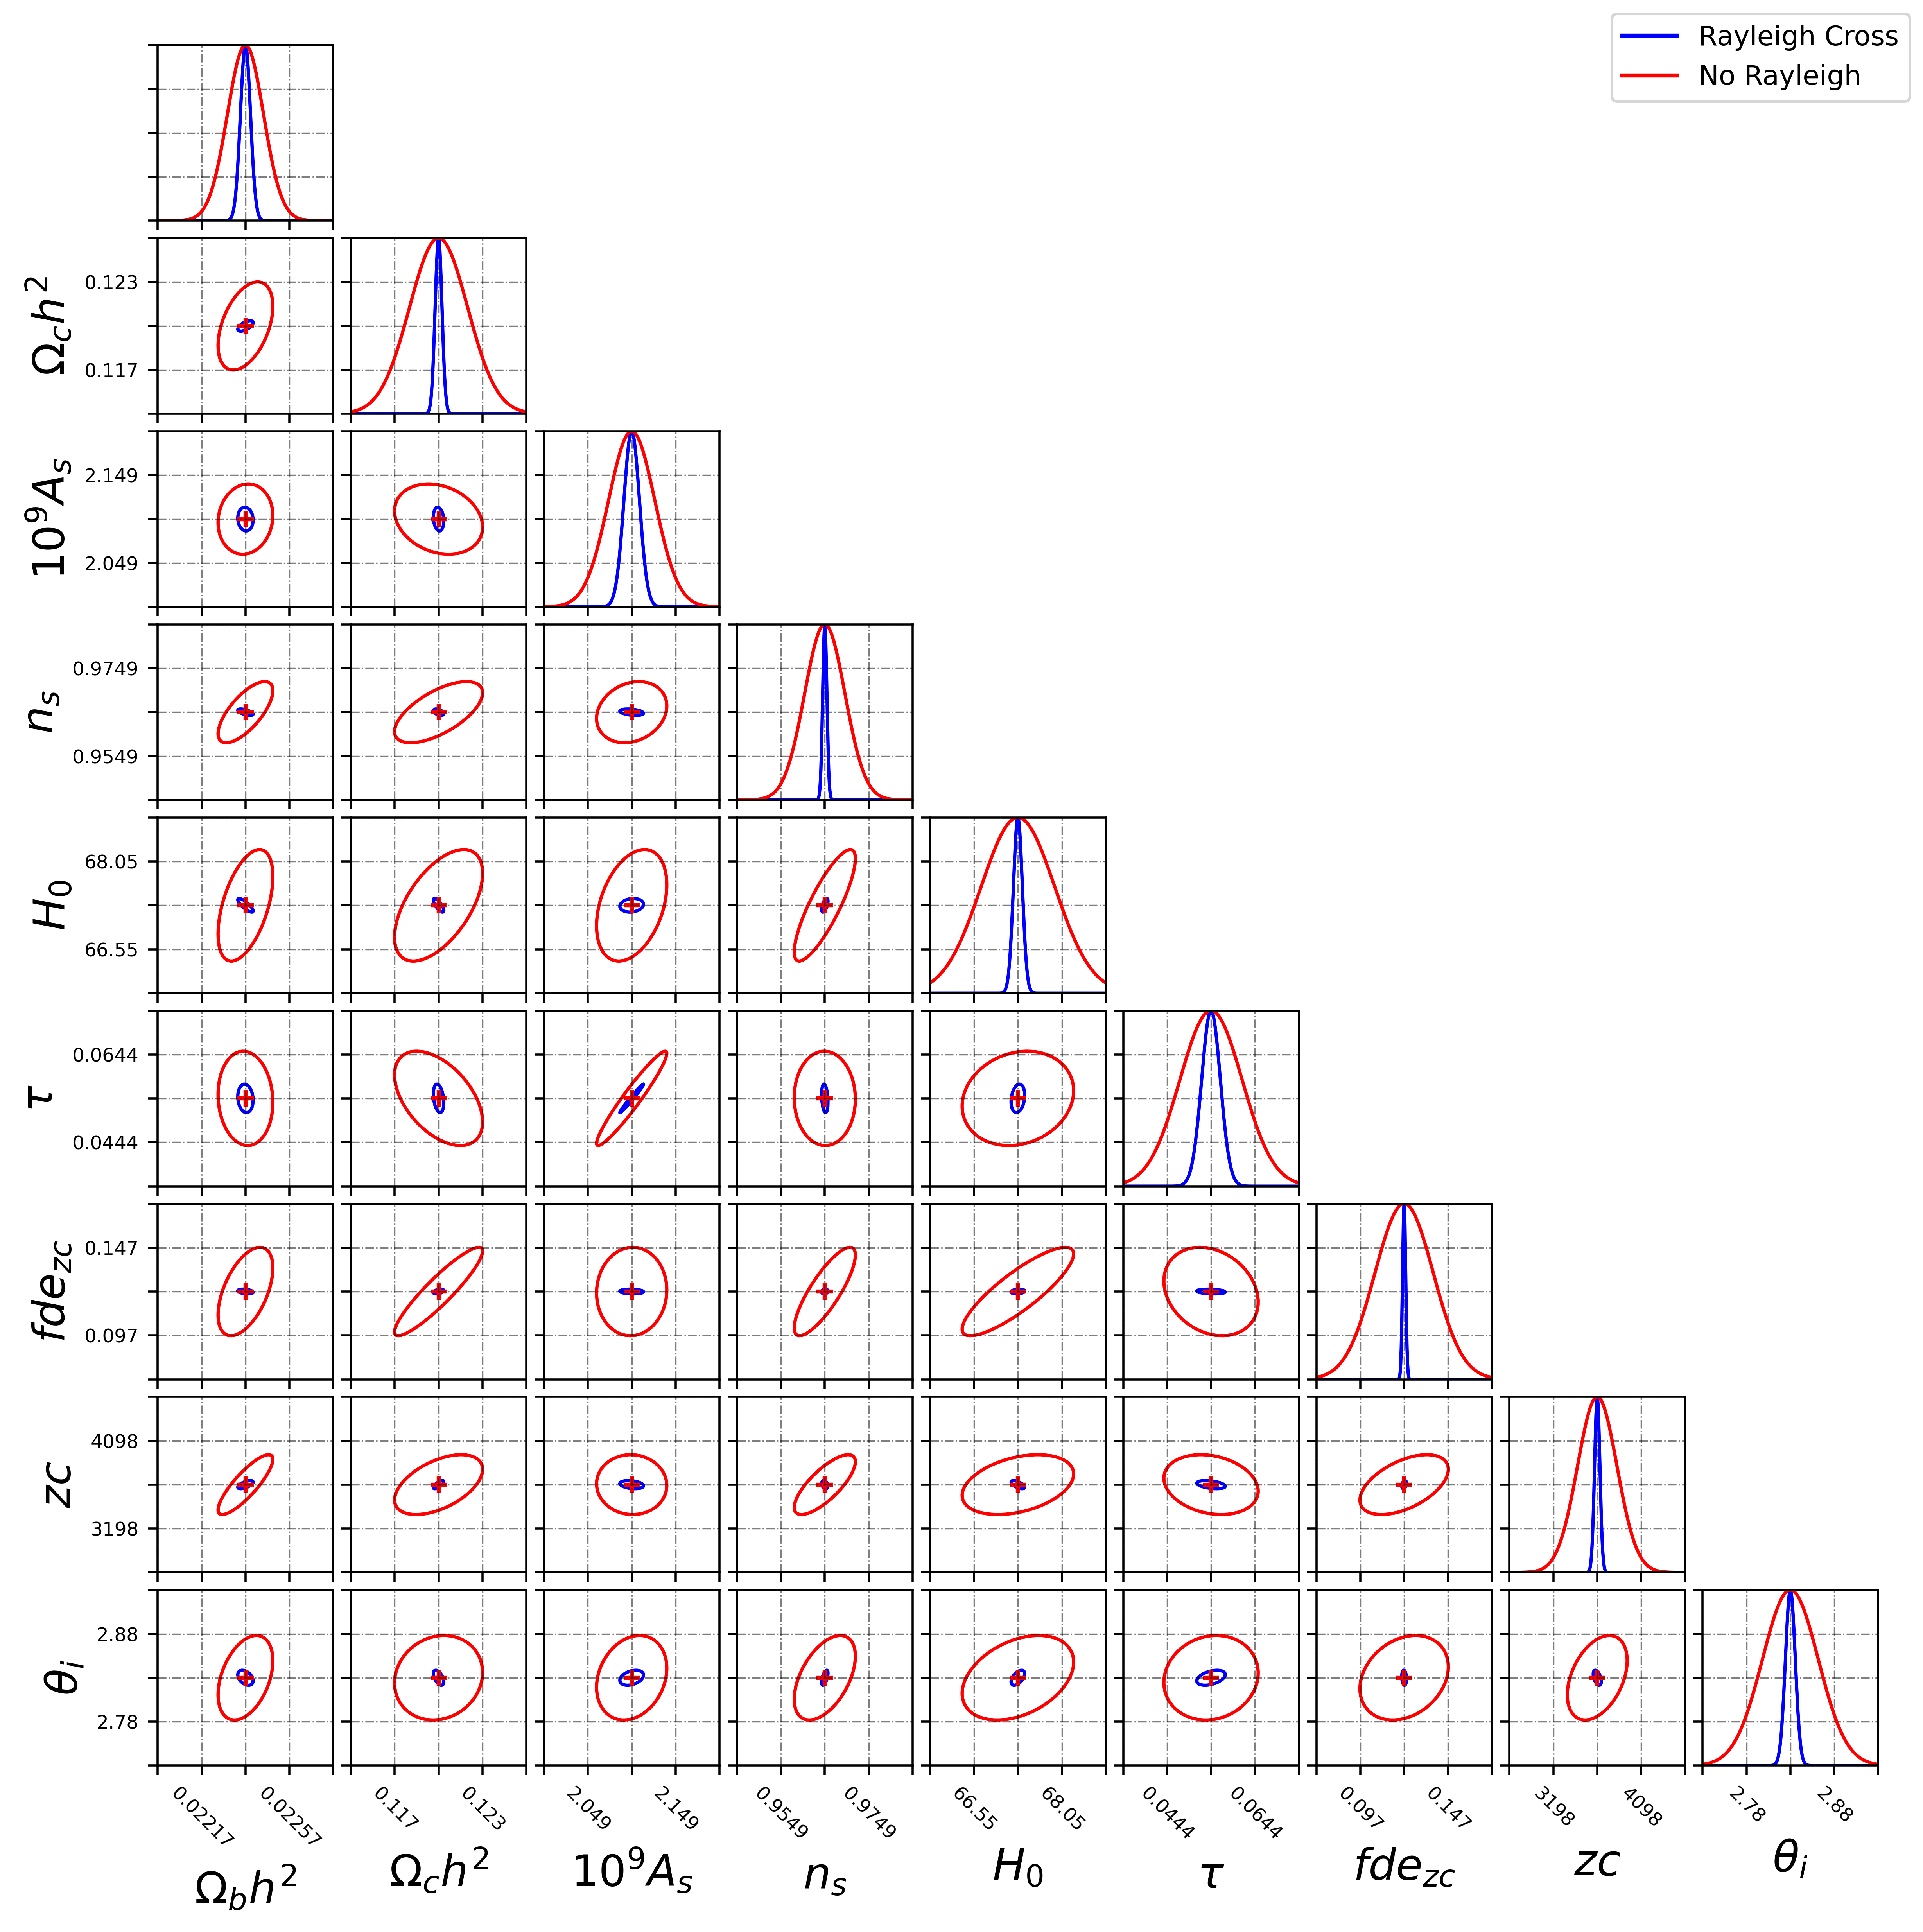

In [30]:
plot_triangular(np.array([Fishermatrix_cross3,Fishermatrix_normal]), param_list, param_values, param_width)